# Exploiting Correlation

Financial Data is meant not only to process data but to understand how meaningful
factors can be used to summarize or represent the data. Let’s understand the role that
correlation and principal components play.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import yfinance as yf

## Generate 5 uncorrelated Gaussian random variables that simulate yield changes (they can be positive or negative with a mean close to 0 and a standard deviation that is small).

In [8]:
np.random.seed(42)
n_obs = 126  # About 6 months of trading days
means = np.zeros(5)
stds = np.full(5, 0.05)  # Small standard deviation
uncorr_data = np.random.normal(loc=means, scale=stds, size=(n_obs, 5))
uncorr_df = pd.DataFrame(uncorr_data, columns=[f'Var{i+1}' for i in range(5)])
uncorr_df.head()

,Var1,Var2,Var3,Var4,Var5
0,0.024836,-0.006913,0.032384,0.076151,-0.011708
1,-0.011707,0.078961,0.038372,-0.023474,0.027128
2,-0.023171,-0.023286,0.012098,-0.095664,-0.086246
3,-0.028114,-0.050642,0.015712,-0.045401,-0.070615
4,0.073282,-0.011289,0.003376,-0.071237,-0.027219


## Run a Principal Components using EITHER the correlation OR covariance matrix.

In [12]:
pca_uncorr = PCA()
pca_uncorr.fit(uncorr_df)
explained_var_ratio_uncorr = pca_uncorr.explained_variance_ratio_


## Write a paragraph explaining how the variances of each component compare with each other. In this paragraph, you will address the following question: how much variance is explained by Component 1, Component 2, Component 3?

Because the variables are uncorrelated and have equal variance, each principal component explains about 20% of the total variance. There is no dominant component, which is what you expect with uncorrelated random data.

In [13]:
print("Variance explained by each principal component (Uncorrelated Data):")
for i, var in enumerate(explained_var_ratio_uncorr):
    print(f"Component {i+1}: {var:.2%}")
print(f"Total: {explained_var_ratio_uncorr.sum():.2%}")


Variance explained by each principal component (Uncorrelated Data):
Component 1: 26.73%
Component 2: 22.13%
Component 3: 18.23%
Component 4: 18.06%
Component 5: 14.84%
Total: 100.00%


## . Produce a screeplot of the variance explained for each component.


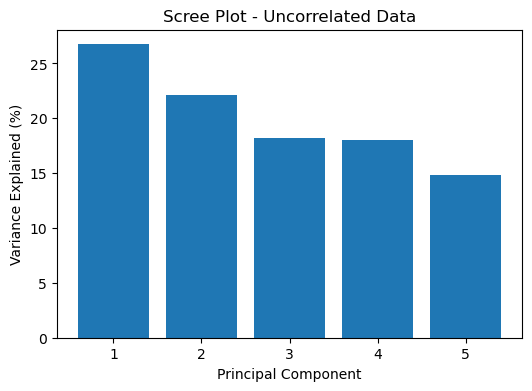

In [14]:
plt.figure(figsize=(6,4))
plt.bar(range(1, 6), explained_var_ratio_uncorr*100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot - Uncorrelated Data')
plt.show()


## Collect the daily closing yields for 5 government securities, say over 6 months.

In [15]:
# Tickers for US Treasury Yields. For Hong Kong, substitute with available HK tickers if needed.
tickers = ['^IRX', '^FVX', '^TNX', '^TYX']
data = yf.download(tickers, start='2024-01-01', end='2024-06-30')['Close']
data = data.dropna()

# Print what you received:
print("Columns from Yahoo Finance:", list(data.columns))

# Assign column names based on what you have:
col_names = ['3M', '5Y', '10Y', '30Y']
data.columns = col_names[:len(data.columns)]  # Only as many as you have

data.head()


C:\Users\okoro\AppData\Local\Temp\ipykernel_19172\4233754860.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2024-01-01', end='2024-06-30')['Close']
[*********************100%***********************]  4 of 4 completed

Columns from Yahoo Finance: ['^FVX', '^IRX', '^TNX', '^TYX']


,3M,5Y,10Y,30Y
Date,,,,
2024-01-02,3.926,5.213,3.946,4.085
2024-01-03,3.891,5.235,3.907,4.056
2024-01-04,3.973,5.228,3.991,4.137
2024-01-05,4.008,5.220,4.042,4.200
2024-01-08,3.956,5.220,4.002,4.173


## compute the daily yield changes!

In [16]:
yield_changes = data.diff().dropna()
yield_changes.head()


,3M,5Y,10Y,30Y
Date,,,,
2024-01-03,-0.035,0.022,-0.039,-0.029
2024-01-04,0.082,-0.007,0.084,0.081
2024-01-05,0.035,-0.008,0.051,0.063
2024-01-08,-0.052,0.000,-0.040,-0.027
2024-01-09,0.023,0.010,0.017,0.012


## Re-run the Principal Components using EITHER the correlation or covariance matrix.

In [17]:
pca_real = PCA()
pca_real.fit(yield_changes)
explained_var_ratio_real = pca_real.explained_variance_ratio_


## How do the variances of each component compare? In other words, how much variance is explained by Component 1, Component 2, Component 3, etc.?

In [18]:
print("Variance explained by each principal component (Real Yield Data):")
for i, var in enumerate(explained_var_ratio_real):
    print(f"Component {i+1}: {var:.2%}")
print(f"Total: {explained_var_ratio_real.sum():.2%}")


Variance explained by each principal component (Real Yield Data):
Component 1: 95.87%
Component 2: 3.65%
Component 3: 0.42%
Component 4: 0.06%
Total: 100.00%


## . Produce a screeplot of the variance explained for each component.

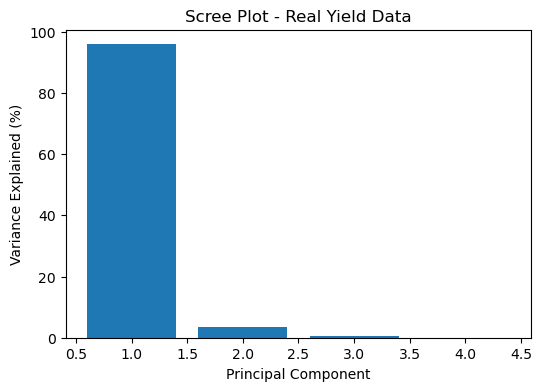

In [19]:
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained_var_ratio_real)+1), explained_var_ratio_real*100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot - Real Yield Data')
plt.show()


# Comparison of Screeplots: Uncorrelated Data vs Government Yield Data

The screeplot for the uncorrelated is relatively flat. Each principal component (bar) explains a similar amount of variance (ranging from about 15% to 27%). This indicates that no single component dominates; the variance is distributed almost evenly across all five components. This is exactly what we expect with randomly generated, uncorrelated data.

The screeplot for the government yield data is very steep. The first principal component explains nearly all the variance (almost 96%), while the remaining components contribute very little (less than 5% combined). This means most of the yield changes in the different bonds move together due to a common underlying factor.